In [28]:
%matplotlib inline

import matplotlib.pyplot as plt
from bionlp.util import func, io

param_tuning = io.read_npz('../data/chmannot/param_tuning_for_random_forest_all.npz')

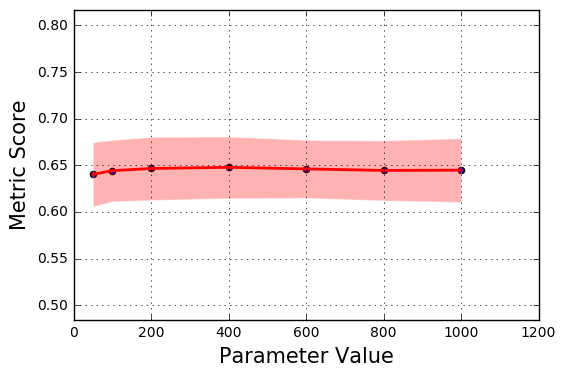

In [125]:
import numpy as np
reload(func)

def analyze_param(param_name, score_avg, score_std, dim_names, dim_vals, best_params):
    best_param_idx = dict([(k, (dim_names[k], dim_vals[k][best_params[k]])) for k in dim_names.keys()])
    best_param_idx[param_name] = (best_param_idx[param_name][0], slice(0, score_avg.shape[dim_names[param_name]]))
    _, slicing = zip(*func.sorted_tuples(best_param_idx.values(), key_idx=0))
    param_vals, _ = zip(*func.sorted_dict(dim_vals[param_name], key='value'))
    return np.array(param_vals), score_avg[slicing], score_std[slicing]

param_name = 'n_estimators'
dim_names, dim_vals, best_params, score_avg, score_std = param_tuning['dim_names'].tolist(), param_tuning['dim_vals'].tolist(), param_tuning['best_params'].tolist(), param_tuning['score_avg_cube'], param_tuning['score_std_cube']
param_dim = dim_names[target_param]
val, avg, std = analyze_param(param_name, score_avg, score_std, dim_names, dim_vals, best_params)

fig = plt.figure()
ax = plt.axes()

plt.scatter(val, avg)
plt.plot(val, avg, linewidth=2, color='r')
lower_val, higher_val = avg - std, avg + std
plt.fill_between(val, lower_val, higher_val, color='w', facecolor='r', alpha=0.3, interpolate=True)

plt.ylim(lower_val.min() * 0.8, higher_val.max() * 1.2)
plt.xlabel('Parameter Value', fontsize=15)
plt.ylabel('Metric Score', fontsize=15)
plt.grid(True)

In [128]:
from bionlp.util import plot
reload(plot)
plot.plot_param(val, avg, std, xlabel='Number of Decision Trees', ylabel='Micro F1 Score')